### Windfarm Notebook

***

The weather data that we are analysing was downloaded from the Met Eireann website. We have downloaded data from the four corners of the country to see if there is a variation in wind speed based on location. We will analyse the data and see if the wind speed for Ireland is changing over time. Is Ireland getting windier, less windier?


<div><img src="https://d3hnfqimznafg0.cloudfront.net/image-handler/ts/20180403085507/ri/850/src/images/Article_Images/ImageForArticle_703(1).jpg" alt="Domain Names", width=640, height=360"></div>


### Description of Project

***

### **Tasks** 

1.  You may look for your own source of historic weather information, and/or
    use the Met Eireann one (Historical Data - Met Éireann - The Irish
    Meteorological Service). Click on the download button to get a zip file that
    contains a CSV file.
1.  You may need to clean and normalize the data before doing analysis

**Questions you can ask:**

1.  How much wind power is there at a particular location? This is quite open ended, is this just the mean wind speed for
    an hour/day/month/year, or should you take into account that there are wind ranges that the windfarms can operate in. (min
    max speeds)

1.  Some analysis of what power when would be useful (time of day/year)

1.  Are the wind speeds likely to be the same in 10 years in the future? ie is there a trend in recorded wind speeds over the last
    few decades.

1.  Is there any other weather metric worth analyzing (eg rain, temp)

1.  What will the power output of the windfarms in Ireland be like next week, according to the weather forecasts? (ok that is a
    tricky one,because you would need to get, or make up, information about the size and locations of the wind farms in Ireland, 
    or find/makeup the windspeed to power output equation.

1.  Anything else you can think of?


### Import the Libraries

***

We use [pandas](https://pandas.pydata.org/) for the DataFrame data structure. It allows us to investigate CSV files, amongst other 
features. 
Pandas is a software library written for the Python programming language, which is used for data manipulation and analysis.

We use [NumPy](https://numpy.org/), which is a library for the Python programming language, which allows us to work with large 
multi-dimensional arrays and matrices. It also supplies a large collection of high-level mathematical functions to operate on these 
arrays. 
[NumPy Wikipedia](https://en.wikipedia.org/wiki/NumPy)

We use [matplotlib](https://matplotlib.org/), which is a plotting library for the Python programming language, and is usually used in 
conjunction with its numerical mathematics extension NumPy.


In [1]:
#Import the necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


### Load the datasets

***

For this project, since it would be useful to analyse windspeed from the four corners of the country I have downloaded multiple datasets from the Met Eireann website into the `data` folder of this repository. The datasets were not identical, in so far as they contain a different number of columns depending upon the location they were taken from. Some datasets contained 17 rows metadata, while others contained 23 rows metadata. Some stations have 15 columns data, while other stations have 21 columns data. Therefore the first 17 rows of some of the datasets, and the first 23 rows of other datasets contained `metadata`, and it was important to skip these rows when importing the dataset.  For clarity, I have demonstrated the steps taken to clean the dataset for the `hly532_dublin_airport_hourly.csv` file in the initial part of this notebook.  The `skiprows=23` argument was passed to the `pd.read_csv()` function to skip the metadata contained in the first number of rows. I have used the metadata in the first 23 rows to rename the columns of the dataset. This makes the datset clearer and easier to read. The `skipinitialspace=True` argument was used while importing the dataset, and the reasoning for this is explained below, when we are looking at the missing values in the dataset.

We then went on to drop the `indicator` columns in the dataset. 

In [2]:

#Set the file path
file_path = './data/'
#Load Dublin data first
file_name = 'hly532_dublin_airport_hourly.csv'
file_name2 = 'hly3904_cork_airport_hourly.csv'
file_name3 = 'hly518_shannon_airport_hourly.csv'
file_name4 = 'hly1475_gurteen_hourly.csv'
file_name5 = 'hly1875_athenry_hourly.csv'


df = pd.read_csv(file_path+file_name, skiprows=23, skipinitialspace=True)

#We need to rename the columns of the dataset as they are not properly named - use the metadata to do this
df.columns = ['Date/Time (utc)', 'Indicator', 'Precipitation Amount (mm)', 'Indicator', 'Temperature (°C)', 'Indicator', 'Wet Bulb Temperature (°C)', 'Dew Point Temp (°C)', 'Vapour Pressure (hPa)','Relative Humidity (%)', 'Mean Sea Level Pressure (hPa)','Indicator', 'Mean Wind Speed (knot)', 'Indicator', 'Predominant Wind Direction (deg)', 'Present Weather', 'Past Weather', 'Sunshine duration (hours)', 'Visibility', 'Cloud Height (ft * 100s)', 'Cloud amount']
df.head()

#We can see that the data is not in the correct format for analysis. We need to clean the data and convert it to the correct format


,Date/Time (utc),Indicator,Precipitation Amount (mm),Indicator,Temperature (°C),Indicator,Wet Bulb Temperature (°C),Dew Point Temp (°C),Vapour Pressure (hPa),Relative Humidity (%),...,Indicator,Mean Wind Speed (knot),Indicator,Predominant Wind Direction (deg),Present Weather,Past Weather,Sunshine duration (hours),Visibility,Cloud Height (ft * 100s),Cloud amount
0,01-jan-1944 00:00,2,0.0,0,7.2,0,6.7,6.1,9.4,93.0,...,1,19,1,290.0,50,5,0.0,20000.0,12.0,8.0
1,01-jan-1944 01:00,0,0.0,0,7.2,0,6.6,6.1,9.3,91.0,...,1,19,1,280.0,2,2,0.0,30000.0,15.0,7.0
2,01-jan-1944 02:00,2,0.0,0,7.2,0,6.6,6.1,9.3,92.0,...,1,19,1,260.0,50,5,0.0,30000.0,15.0,8.0
3,01-jan-1944 03:00,2,0.0,0,7.2,0,6.5,5.5,9.1,90.0,...,1,19,1,270.0,50,5,0.0,20000.0,15.0,7.0
4,01-jan-1944 04:00,0,0.0,0,7.2,0,6.5,5.5,9.1,89.0,...,1,19,1,270.0,2,2,0.0,30000.0,18.0,7.0


# Clean the dataset

We can see above that the dataset is not in the format we want. We need to clean up the datset before we do any analysis on it.

In [3]:
#First we need to remove the 'Indicator' columns
df = df.drop(columns=['Indicator'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708601 entries, 0 to 708600
Data columns (total 16 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Date/Time (utc)                   708601 non-null  object 
 1   Precipitation Amount (mm)         708601 non-null  float64
 2   Temperature (°C)                  708601 non-null  float64
 3   Wet Bulb Temperature (°C)         708601 non-null  float64
 4   Dew Point Temp (°C)               708601 non-null  float64
 5   Vapour Pressure (hPa)             708600 non-null  float64
 6   Relative Humidity (%)             708600 non-null  float64
 7   Mean Sea Level Pressure (hPa)     708601 non-null  float64
 8   Mean Wind Speed (knot)            708601 non-null  int64  
 9   Predominant Wind Direction (deg)  708600 non-null  float64
 10  Present Weather                   708601 non-null  int64  
 11  Past Weather                      708601 non-null  i

Next lets drop any rows that contain na values

In [4]:
#Check for missing values

missing_values =df.isna().sum()

print(missing_values)


Date/Time (utc)                       0
Precipitation Amount (mm)             0
Temperature (°C)                      0
Wet Bulb Temperature (°C)             0
Dew Point Temp (°C)                   0
Vapour Pressure (hPa)                 1
Relative Humidity (%)                 1
Mean Sea Level Pressure (hPa)         0
Mean Wind Speed (knot)                0
Predominant Wind Direction (deg)      1
Present Weather                       0
Past Weather                          0
Sunshine duration (hours)             0
Visibility                          344
Cloud Height (ft * 100s)             24
Cloud amount                         24
dtype: int64


In [5]:
#Drop the rows with missing values

df.dropna(inplace=True)

#Check for missing values again
missing_values =df.isna().sum()

print(missing_values)


Date/Time (utc)                     0
Precipitation Amount (mm)           0
Temperature (°C)                    0
Wet Bulb Temperature (°C)           0
Dew Point Temp (°C)                 0
Vapour Pressure (hPa)               0
Relative Humidity (%)               0
Mean Sea Level Pressure (hPa)       0
Mean Wind Speed (knot)              0
Predominant Wind Direction (deg)    0
Present Weather                     0
Past Weather                        0
Sunshine duration (hours)           0
Visibility                          0
Cloud Height (ft * 100s)            0
Cloud amount                        0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708255 entries, 0 to 708600
Data columns (total 16 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Date/Time (utc)                   708255 non-null  object 
 1   Precipitation Amount (mm)         708255 non-null  float64
 2   Temperature (°C)                  708255 non-null  float64
 3   Wet Bulb Temperature (°C)         708255 non-null  float64
 4   Dew Point Temp (°C)               708255 non-null  float64
 5   Vapour Pressure (hPa)             708255 non-null  float64
 6   Relative Humidity (%)             708255 non-null  float64
 7   Mean Sea Level Pressure (hPa)     708255 non-null  float64
 8   Mean Wind Speed (knot)            708255 non-null  int64  
 9   Predominant Wind Direction (deg)  708255 non-null  float64
 10  Present Weather                   708255 non-null  int64  
 11  Past Weather                      708255 non-null  int64 

In [7]:
#As we will be analysing the data by month, we need to convert the 'Date/Time (utc)' column to a datetime 

df['Date/Time (utc)'] = pd.to_datetime(df['Date/Time (utc)'], format='%d-%b-%Y %H:%M')
print(df['Date/Time (utc)'])

#Extract the month from the 'Date/Time (utc)' column
df['Month'] = df['Date/Time (utc)'].dt.month

#Extract the year from the 'Date/Time (utc)' column
df['Year'] = df['Date/Time (utc)'].dt.year


df.head()


0        1944-01-01 00:00:00
1        1944-01-01 01:00:00
2        1944-01-01 02:00:00
3        1944-01-01 03:00:00
4        1944-01-01 04:00:00
                 ...        
708596   2024-10-31 20:00:00
708597   2024-10-31 21:00:00
708598   2024-10-31 22:00:00
708599   2024-10-31 23:00:00
708600   2024-11-01 00:00:00
Name: Date/Time (utc), Length: 708255, dtype: datetime64[ns]


,Date/Time (utc),Precipitation Amount (mm),Temperature (°C),Wet Bulb Temperature (°C),Dew Point Temp (°C),Vapour Pressure (hPa),Relative Humidity (%),Mean Sea Level Pressure (hPa),Mean Wind Speed (knot),Predominant Wind Direction (deg),Present Weather,Past Weather,Sunshine duration (hours),Visibility,Cloud Height (ft * 100s),Cloud amount,Month,Year
0,1944-01-01 00:00:00,0.0,7.2,6.7,6.1,9.4,93.0,1027.9,19,290.0,50,5,0.0,20000.0,12.0,8.0,1,1944
1,1944-01-01 01:00:00,0.0,7.2,6.6,6.1,9.3,91.0,1027.6,19,280.0,2,2,0.0,30000.0,15.0,7.0,1,1944
2,1944-01-01 02:00:00,0.0,7.2,6.6,6.1,9.3,92.0,1027.0,19,260.0,50,5,0.0,30000.0,15.0,8.0,1,1944
3,1944-01-01 03:00:00,0.0,7.2,6.5,5.5,9.1,90.0,1026.2,19,270.0,50,5,0.0,20000.0,15.0,7.0,1,1944
4,1944-01-01 04:00:00,0.0,7.2,6.5,5.5,9.1,89.0,1025.5,19,270.0,2,2,0.0,30000.0,18.0,7.0,1,1944


So, what columns are we interested in analysing. Obviously we need to analyse the wind speed column. Will temperature, wind-direction, precipitaion amount etc have any effect on the windspeed. Lets have a quick loot at the correlation between the variables in the dataset, is something standing out?

In [8]:

#Drop columns that are not needed for correlation analysis
correlation_df = df.drop(columns=['Date/Time (utc)', 'Present Weather', 'Past Weather', 'Visibility', 'Cloud Height (ft * 100s)', 'Cloud amount', 'Month', 'Year'])

#Correlate the data to see if there are any relationships between the variables
correlation = correlation_df.corr()


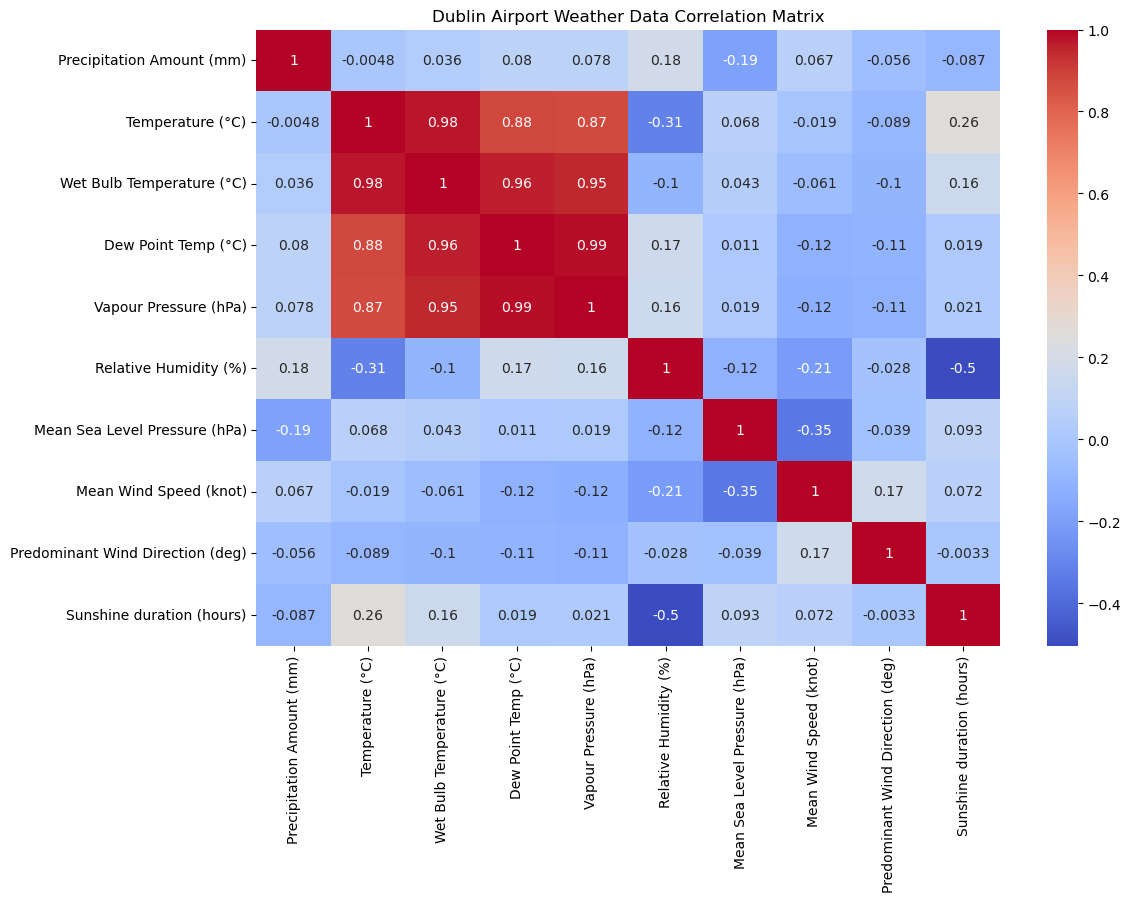

In [9]:
 #Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Dublin Airport Weather Data Correlation Matrix')
plt.show()



So there doesn't appear to be any relationship between the other variables and windspeed. We possibly need to write a python script to import the other locations, seeing as we will be repeating all the step above for each location.

In [10]:
relevant_columns = ['Temperature (°C)', 'Wet Bulb Temperature (°C)', 'Dew Point Temp (°C)', 'Vapour Pressure (hPa)','Relative Humidity (%)', 'Mean Sea Level Pressure (hPa)', 'Mean Wind Speed (knot)', 'Predominant Wind Direction (deg)']

mean = df[relevant_columns].mean()
median = df[relevant_columns].median()
std_dev = df[relevant_columns].std()

In [11]:
#Create a summary dataframe

descriptive_stats = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std_dev})

descriptive_stats

,Mean,Median,Standard Deviation
Temperature (°C),9.650505,9.7,4.885554
Wet Bulb Temperature (°C),8.210978,8.4,4.404244
Dew Point Temp (°C),6.590117,6.9,4.591126
Vapour Pressure (hPa),10.162024,9.9,3.125446
Relative Humidity (%),82.132000,84.0,11.713032
Mean Sea Level Pressure (hPa),1013.586984,1014.8,12.342315
Mean Wind Speed (knot),10.145904,9.0,5.699547
Predominant Wind Direction (deg),202.516156,230.0,88.157521


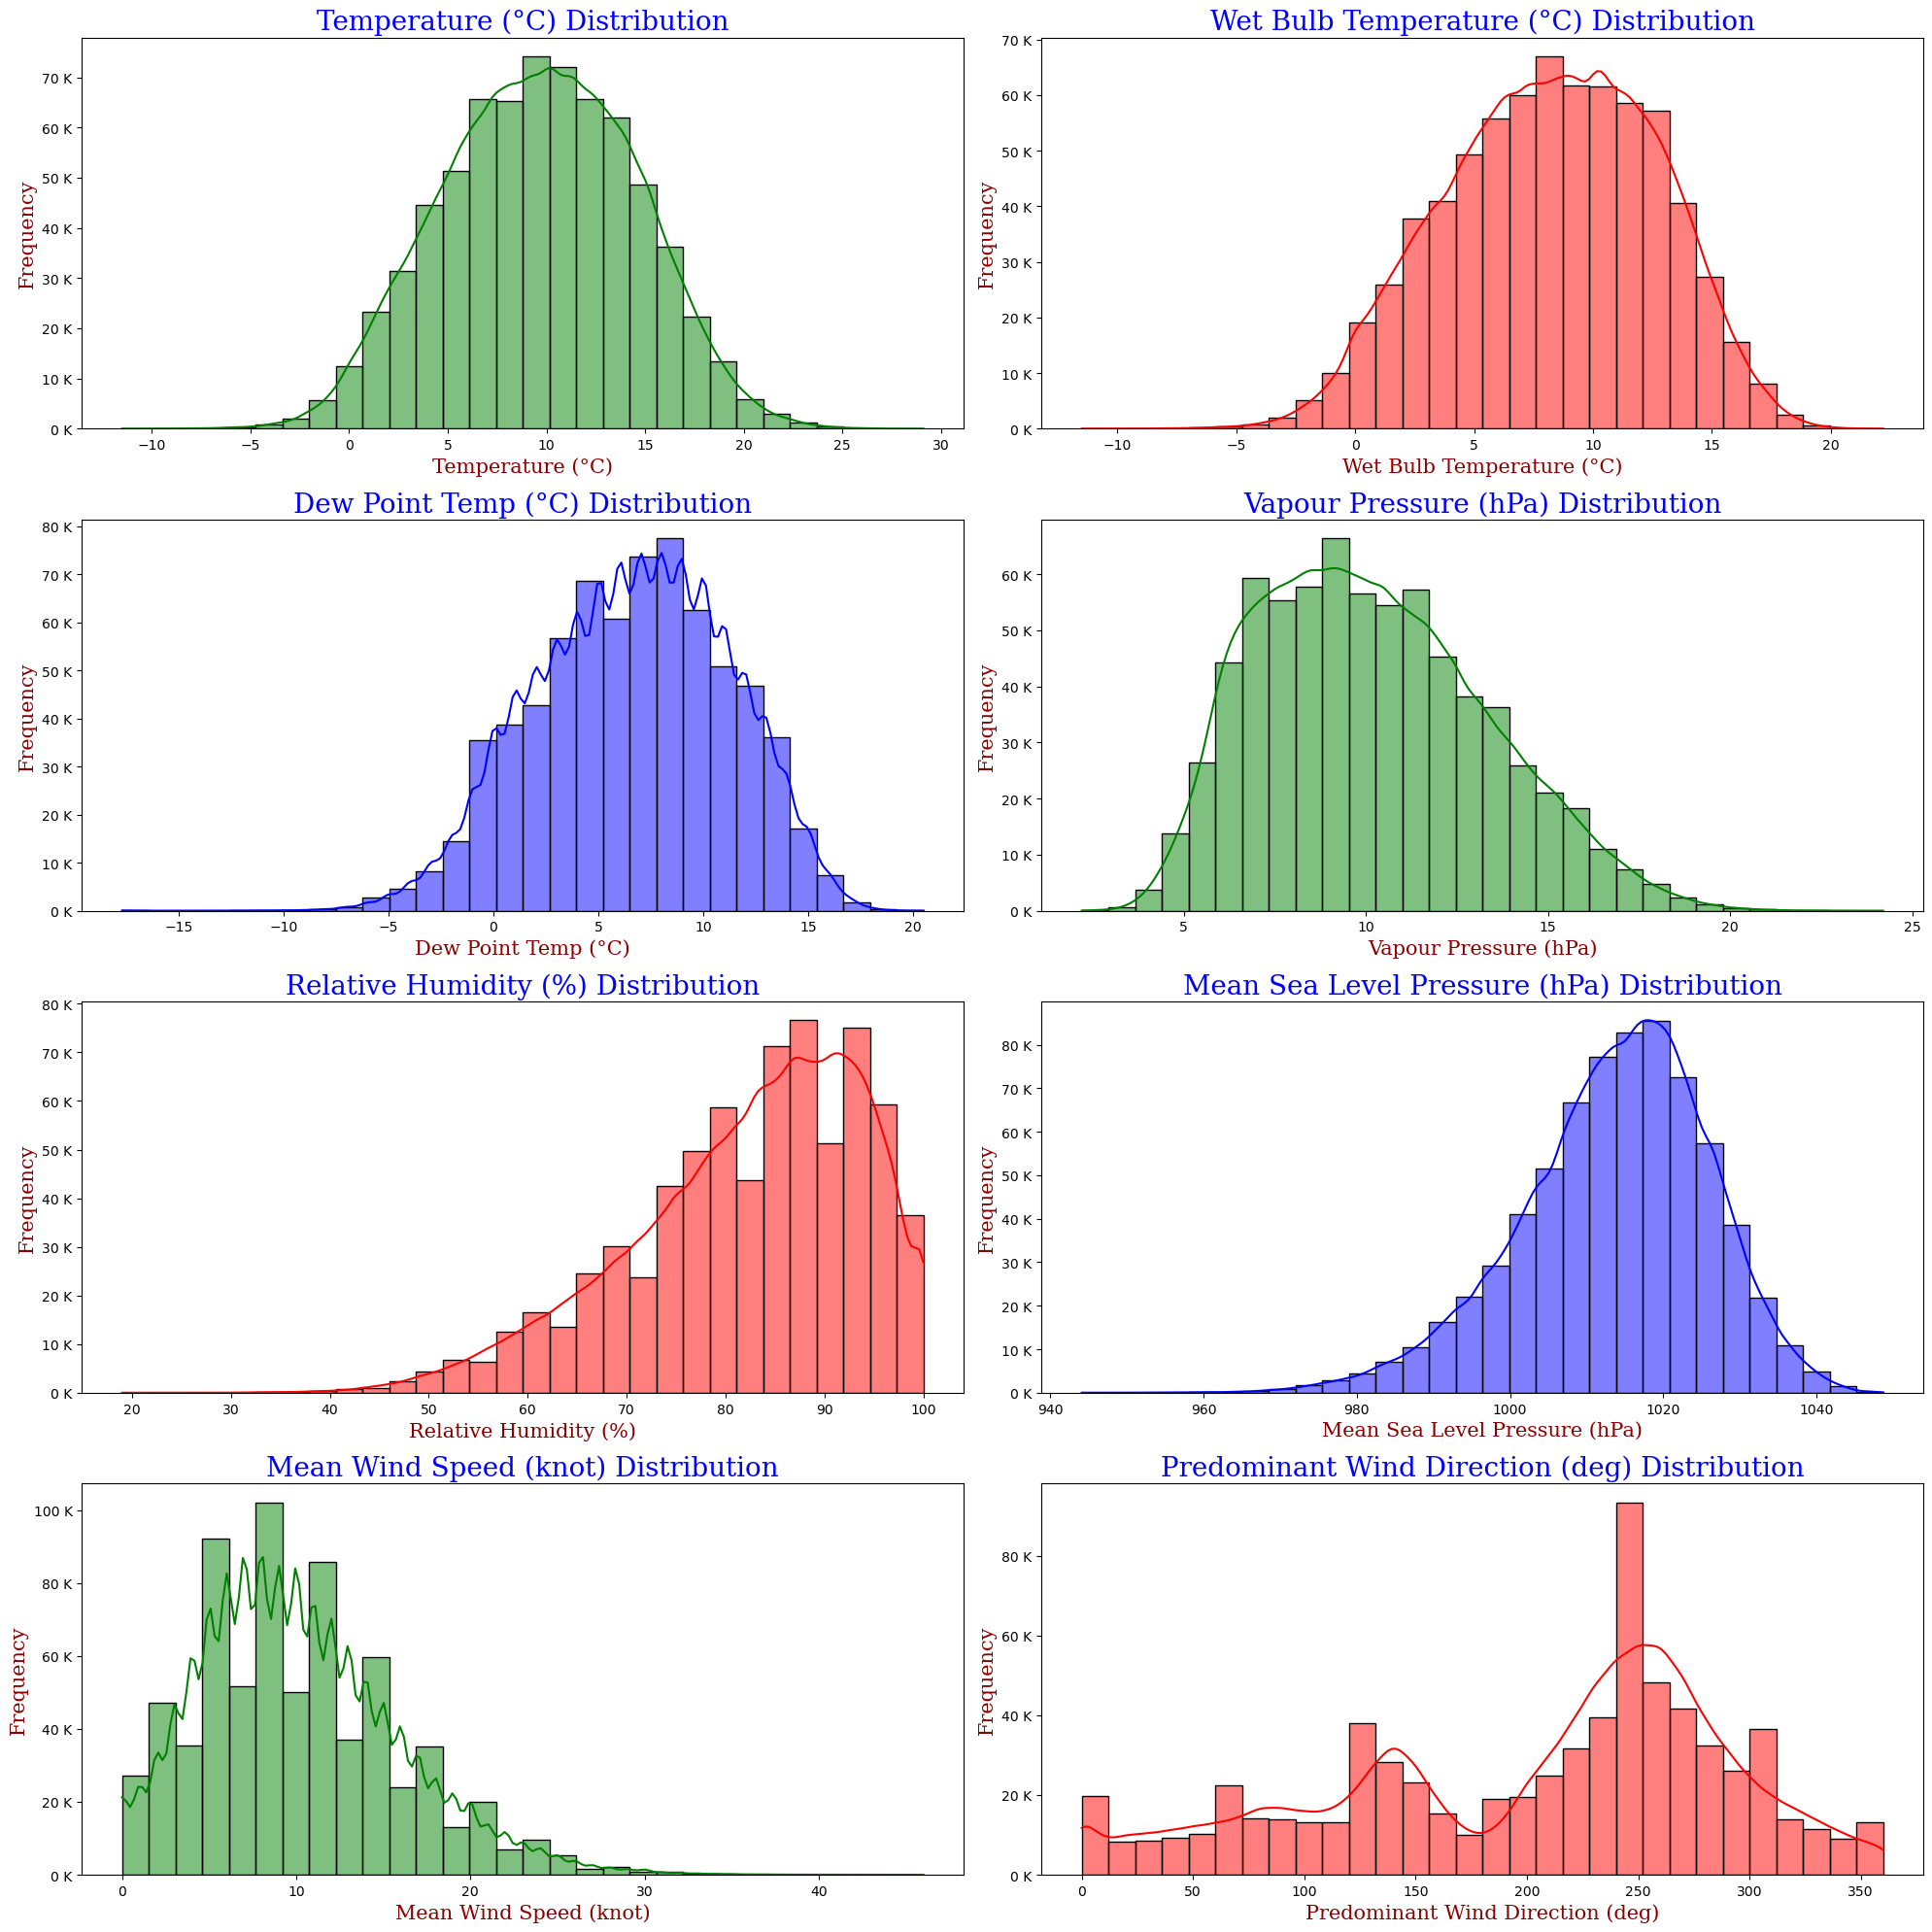

In [12]:
#Histograms for each of the variables
plt.figure(figsize=(20, 20))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Create a function to format the frequency values on the y-axis
def frequency_formatter(frequency, pos):
    frequency = int(frequency/1000)
    s = f"{frequency} K"
    return s


for i, col in enumerate(relevant_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], bins=30, kde=True, color=colors[i%3])
    plt.title(f'{col} Distribution', fontdict=font1)
    plt.xlabel(col, fontdict=font2)
    plt.ylabel('Frequency', fontdict=font2)

    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(frequency_formatter))

plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

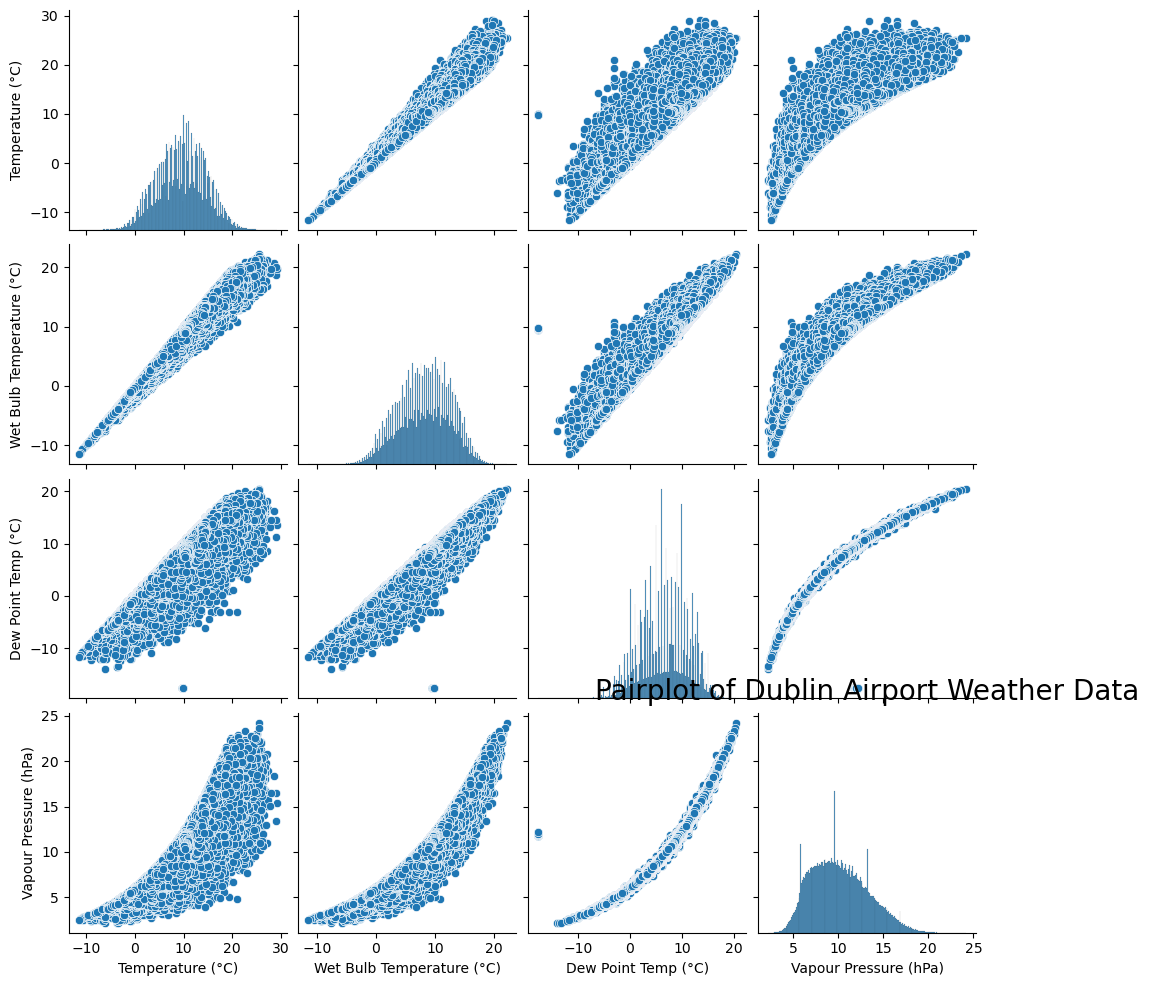

<Figure size 2000x2000 with 0 Axes>

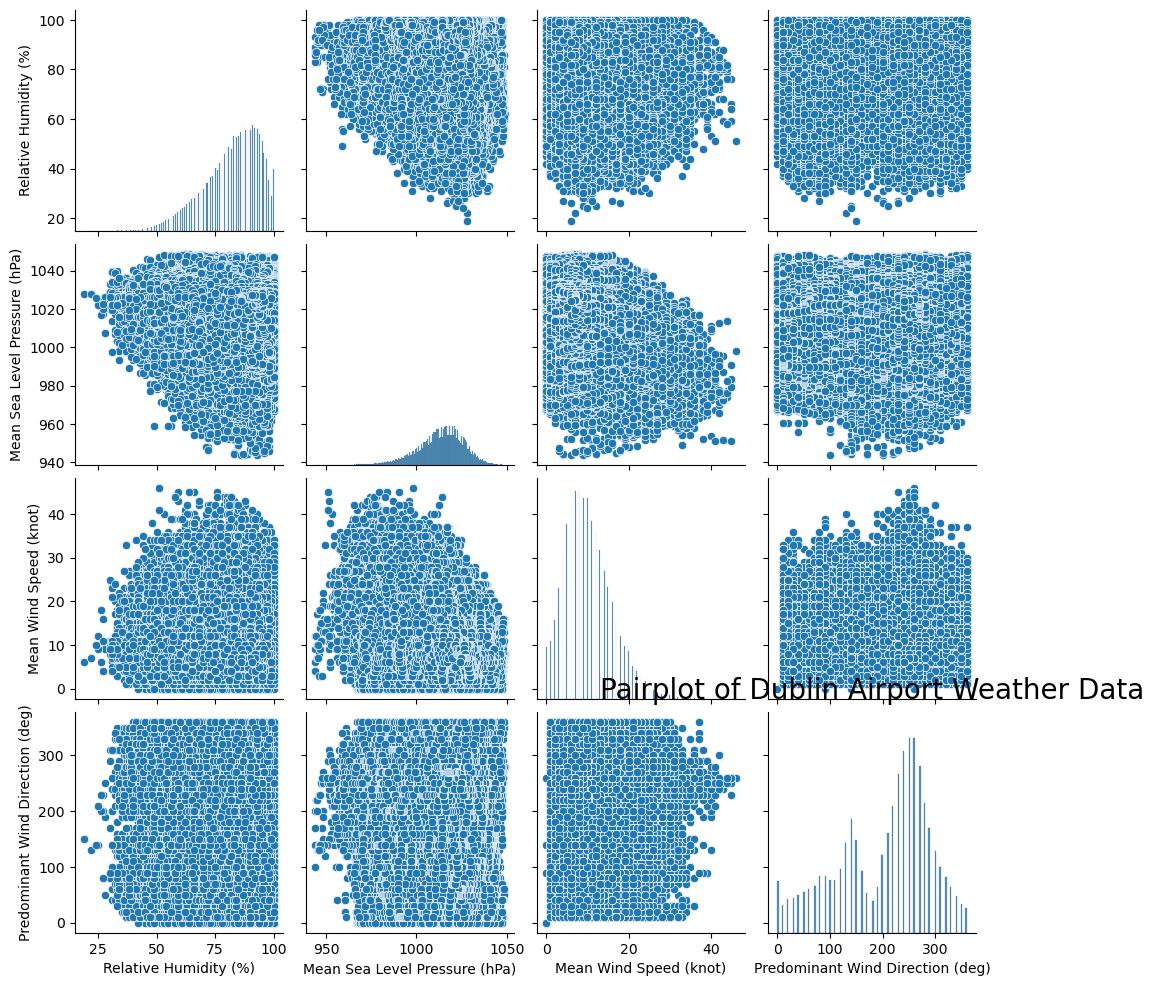

In [28]:
#Pairplots of the variables. Too many vairables to plot all at once so we will plot them in groups of 4

plt.figure(figsize=(20, 20))
sns.pairplot(df[relevant_columns[:4]])
plt.title('Pairplot of Dublin Airport Weather Data', y=1.02, fontsize=20)

plt.show()

plt.figure(figsize=(20, 20))
sns.pairplot(df[relevant_columns[4:]])
plt.title('Pairplot of Dublin Airport Weather Data', y=1.02, fontsize=20)

plt.show()


In [14]:
#Looking at the above correlation data, there does not appear to be any strong correlations between the variables. 
#The windspeed and temperature have a negative correlation which is expected, but the correlation is weak.

#It looks like we will only be interested in the windspeed column in each of the datasets for our analysis.
dublin_windspeed = df[['Date/Time (utc)', 'Mean Wind Speed (knot)', 'Month', 'Year']].copy()

dublin_windspeed.head()


,Date/Time (utc),Mean Wind Speed (knot),Month,Year
0,1944-01-01 00:00:00,19,1,1944
1,1944-01-01 01:00:00,19,1,1944
2,1944-01-01 02:00:00,19,1,1944
3,1944-01-01 03:00:00,19,1,1944
4,1944-01-01 04:00:00,19,1,1944


In [15]:
# Finally as we will be combining data from multiple datasets, we need to rename the 'Mean Wind Speed (knot)' column to 'Mean Wind Speed (knot) Dublin'

dublin_windspeed.rename(columns={'Mean Wind Speed (knot)': 'Mean Wind Speed (knot) Dublin'}, inplace=True)

dublin_windspeed.head()

,Date/Time (utc),Mean Wind Speed (knot) Dublin,Month,Year
0,1944-01-01 00:00:00,19,1,1944
1,1944-01-01 01:00:00,19,1,1944
2,1944-01-01 02:00:00,19,1,1944
3,1944-01-01 03:00:00,19,1,1944
4,1944-01-01 04:00:00,19,1,1944


Okay, so lets look at repeating the above steps for the other datasets we are interested in using a python class. Lets call an instance of the class to clean each dataset. Lets call our class the `clean_dataset`, and repeat each step above within for each dataset.

In [16]:
#Lets try calling our class and running the functions on the other datasets
#Import the class
from python.clean_dataset import CleanDataset as clean

#Create an instance of the class
cork_windspeed = clean(file_name2, 23)

#Clean the dataset
cork_windspeed = cork_windspeed.clean_dataset()

Dataset imported
Removing NA values
Indicator columns removed
Datetime cleaned
Wind column renamed
      Date/Time (utc)  Mean Wind Speed (knot)_cork  Month  Year
0 1962-04-01 00:00:00                           12      4  1962
1 1962-04-01 01:00:00                           12      4  1962
2 1962-04-01 02:00:00                           13      4  1962
3 1962-04-01 03:00:00                           13      4  1962
4 1962-04-01 04:00:00                            5      4  1962


In [17]:
cork_windspeed.head()

,Date/Time (utc),Mean Wind Speed (knot)_cork,Month,Year
0,1962-04-01 00:00:00,12,4,1962
1,1962-04-01 01:00:00,12,4,1962
2,1962-04-01 02:00:00,13,4,1962
3,1962-04-01 03:00:00,13,4,1962
4,1962-04-01 04:00:00,5,4,1962


In [18]:
cork_windspeed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548525 entries, 0 to 548524
Data columns (total 4 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Date/Time (utc)              548525 non-null  datetime64[ns]
 1   Mean Wind Speed (knot)_cork  548525 non-null  int64         
 2   Month                        548525 non-null  int32         
 3   Year                         548525 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1)
memory usage: 12.6 MB


In [19]:
missing_values =cork_windspeed.isna().sum()

print(missing_values)

Date/Time (utc)                0
Mean Wind Speed (knot)_cork    0
Month                          0
Year                           0
dtype: int64


In [20]:
#Do the same for shannon airport

shannon_windspeed = clean(file_name3, 23)

shannon_windspeed = shannon_windspeed.clean_dataset()


Dataset imported
Removing NA values
Indicator columns removed
Datetime cleaned
Wind column renamed
      Date/Time (utc)  Mean Wind Speed (knot)_shannon  Month  Year
0 1945-09-01 01:00:00                            17.0      9  1945
1 1945-09-01 02:00:00                            17.0      9  1945
2 1945-09-01 03:00:00                            17.0      9  1945
3 1945-09-01 04:00:00                            14.0      9  1945
4 1945-09-01 05:00:00                            16.0      9  1945


Getting a warning when pushing up to github after adding shannon airport data to datasets. The dataset is above the GitHub recommended maximum file size of 50.00 MB. The warning is as below. Need to research and explore options around this.....

![Visual Studio Code Warning](./images/github_largefile.png)

In [21]:
# For consistency, we will do the same for the Dublin dataset that we demonstrated above

dublin_windpseed1 = clean(file_name, 23)

dublin_windspeed1 = dublin_windpseed1.clean_dataset()

Dataset imported
Removing NA values
Indicator columns removed
Datetime cleaned
Wind column renamed
      Date/Time (utc)  Mean Wind Speed (knot)_dublin  Month  Year
0 1944-01-01 00:00:00                             19      1  1944
1 1944-01-01 01:00:00                             19      1  1944
2 1944-01-01 02:00:00                             19      1  1944
3 1944-01-01 03:00:00                             19      1  1944
4 1944-01-01 04:00:00                             19      1  1944


In [22]:
#Do the same for Gurteen

gurteen_windspeed = clean(file_name4, 17)

gurteen_windspeed = gurteen_windspeed.clean_dataset()



Dataset imported
Removing NA values
Indicator columns removed
Datetime cleaned
Wind column renamed
      Date/Time (utc)  Mean Wind Speed (knot)_gurteen  Month  Year
0 2008-02-05 17:00:00                             3.0      2  2008
1 2008-02-05 18:00:00                             7.0      2  2008
2 2008-02-05 19:00:00                            10.0      2  2008
3 2008-02-05 20:00:00                            10.0      2  2008
4 2008-02-05 21:00:00                            11.0      2  2008


In [23]:
# And the athenry dataset

athenry_windspeed = clean(file_name5, 17)

athenry_windspeed = athenry_windspeed.clean_dataset()


Dataset imported
Removing NA values
Indicator columns removed
Datetime cleaned
Wind column renamed
      Date/Time (utc)  Mean Wind Speed (knot)_athenry  Month  Year
0 2010-02-26 01:00:00                             7.0      2  2010
1 2010-02-26 02:00:00                             7.0      2  2010
2 2010-02-26 03:00:00                             7.0      2  2010
3 2010-02-26 04:00:00                             8.0      2  2010
4 2010-02-26 05:00:00                             7.0      2  2010


Okay so lets look at combinging the Windspeed for each of the above into one dataset. What do we need to consider here. Since athenry data is only from 2010 onwards, do we need to crop the other datasets to include data from 2010 onwards. Perhaps, we could use Dublin and Shannon for better analysis since they started to record data in 1944 and 1945 respectively. Maybe a combination of both. 

In [24]:
# Now that we have cleaned the datasets, we can combine them into one dataset for analysis

#we will merge the datasets on the 'Date/Time (utc)' column
#We can only merge two datasets at a time, so we will merge the datasets in pairs
#Taken from https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
#Dublin and Cork
overall_windspeed = pd.merge(dublin_windspeed1, cork_windspeed, on=['Date/Time (utc)', 'Year', 'Month'],  how='inner')
#Add Shannon
overall_windspeed = pd.merge(overall_windspeed, shannon_windspeed, on=['Date/Time (utc)', 'Year', 'Month'], how='inner')
#Add Gurteen
overall_windspeed = pd.merge(overall_windspeed, gurteen_windspeed, on=['Date/Time (utc)', 'Year', 'Month'], how='inner')
#Add Athenry
overall_windspeed = pd.merge(overall_windspeed, athenry_windspeed, on=['Date/Time (utc)', 'Year', 'Month'], how='inner')

overall_windspeed.head()


,Date/Time (utc),Mean Wind Speed (knot)_dublin,Month,Year,Mean Wind Speed (knot)_cork,Mean Wind Speed (knot)_shannon,Mean Wind Speed (knot)_gurteen,Mean Wind Speed (knot)_athenry
0,2010-02-26 01:00:00,7,2,2010,15,7.0,9.0,7.0
1,2010-02-26 02:00:00,7,2,2010,15,8.0,9.0,7.0
2,2010-02-26 03:00:00,7,2,2010,15,10.0,9.0,7.0
3,2010-02-26 04:00:00,8,2,2010,17,14.0,9.0,8.0
4,2010-02-26 05:00:00,8,2,2010,18,15.0,9.0,7.0


In [25]:
overall_windspeed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128337 entries, 0 to 128336
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Date/Time (utc)                 128337 non-null  datetime64[ns]
 1   Mean Wind Speed (knot)_dublin   128337 non-null  int64         
 2   Month                           128337 non-null  int32         
 3   Year                            128337 non-null  int32         
 4   Mean Wind Speed (knot)_cork     128337 non-null  int64         
 5   Mean Wind Speed (knot)_shannon  128337 non-null  float64       
 6   Mean Wind Speed (knot)_gurteen  128337 non-null  float64       
 7   Mean Wind Speed (knot)_athenry  128337 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2)
memory usage: 6.9 MB


In [26]:
overall_windspeed.isna().sum()

Date/Time (utc)                   0
Mean Wind Speed (knot)_dublin     0
Month                             0
Year                              0
Mean Wind Speed (knot)_cork       0
Mean Wind Speed (knot)_shannon    0
Mean Wind Speed (knot)_gurteen    0
Mean Wind Speed (knot)_athenry    0
dtype: int64

In [27]:
overall_windspeed.describe()


,Date/Time (utc),Mean Wind Speed (knot)_dublin,Month,Year,Mean Wind Speed (knot)_cork,Mean Wind Speed (knot)_shannon,Mean Wind Speed (knot)_gurteen,Mean Wind Speed (knot)_athenry
count,128337,128337.000000,128337.000000,128337.000000,128337.000000,128337.000000,128337.000000,128337.000000
mean,2017-07-02 02:54:22.067837184,10.045061,6.513468,2017.000553,9.688056,8.883806,8.266556,7.279787
min,2010-02-26 01:00:00,0.000000,1.000000,2010.000000,0.000000,0.000000,0.000000,0.000000
25%,2013-10-31 18:00:00,6.000000,4.000000,2013.000000,6.000000,5.000000,5.000000,4.000000
50%,2017-07-03 01:00:00,9.000000,7.000000,2017.000000,9.000000,8.000000,8.000000,7.000000
75%,2021-03-02 10:00:00,13.000000,9.000000,2021.000000,13.000000,12.000000,11.000000,10.000000
max,2024-11-01 00:00:00,44.000000,12.000000,2024.000000,45.000000,52.000000,39.000000,33.000000
std,NaN,5.104121,3.407231,4.240599,5.036895,5.149814,4.576600,4.044692
